In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("ObesityDataSet.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:

# Display basic information about the dataset
print(data.info())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
data.describe() 


Basic statistics of the dataset:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# Display the column names
print("\nColumn names:")
data.columns


Column names:


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
#Check for and handle missing values
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
#Check for and handle duplicate entries
print("\nChecking for duplicate entries:")
print(data.duplicated().sum())


Checking for duplicate entries:
24


In [7]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


In [8]:
# Display cleaned data information
print("\nCleaned dataset information:")
print(data.info())


Cleaned dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF      

In [9]:
# Save cleaned data to a new CSV file
data.to_csv("Cleaned_ObesityDataSet.csv", index=False)
print("\nCleaned dataset saved to 'Cleaned_ObesityDataSet.csv'")


Cleaned dataset saved to 'Cleaned_ObesityDataSet.csv'


In [10]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("Cleaned_ObesityDataSet.csv")

In [11]:

# Get a summary of the data
cleaned_data.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000



Distribution of gender:
Gender
Male      1052
Female    1035
Name: count, dtype: int64


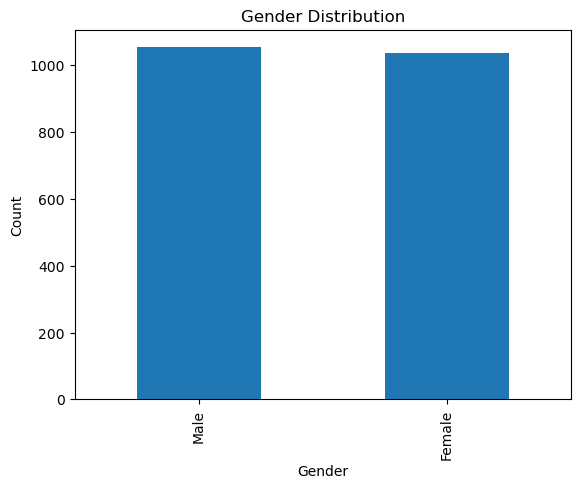

In [12]:

gender_column = 'Gender'   

# Display the distribution of gender
gender_distribution = cleaned_data[gender_column].value_counts()
print("\nDistribution of gender:")
print(gender_distribution)

# Plot the distribution of gender
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

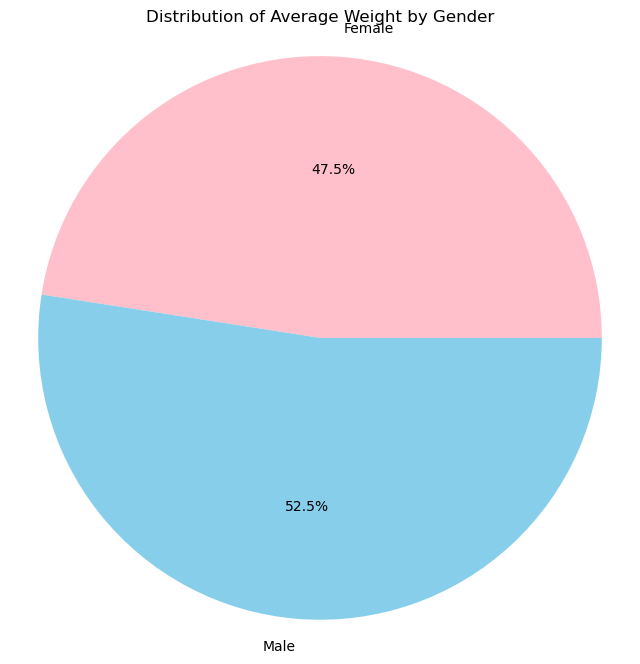

In [15]:
gender_column = 'Gender'  # Replace with the actual column name if different
weight_column = 'Weight'  # Replace with the actual column name if different

# Group the data by gender and calculate the average weight within each group
average_weight_by_gender = cleaned_data.groupby(gender_column)[weight_column].mean()

# Plot a pie chart to visualize the distribution of average weight by gender
plt.figure(figsize=(8, 8))
plt.pie(average_weight_by_gender, labels=average_weight_by_gender.index, autopct='%1.1f%%', colors=['pink', 'skyblue'])
plt.title('Distribution of Average Weight by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Summary statistics of age:
count    2087.000000
mean       24.353090
std         6.368801
min        14.000000
25%        19.915937
50%        22.847618
75%        26.000000
max        61.000000
Name: Age, dtype: float64


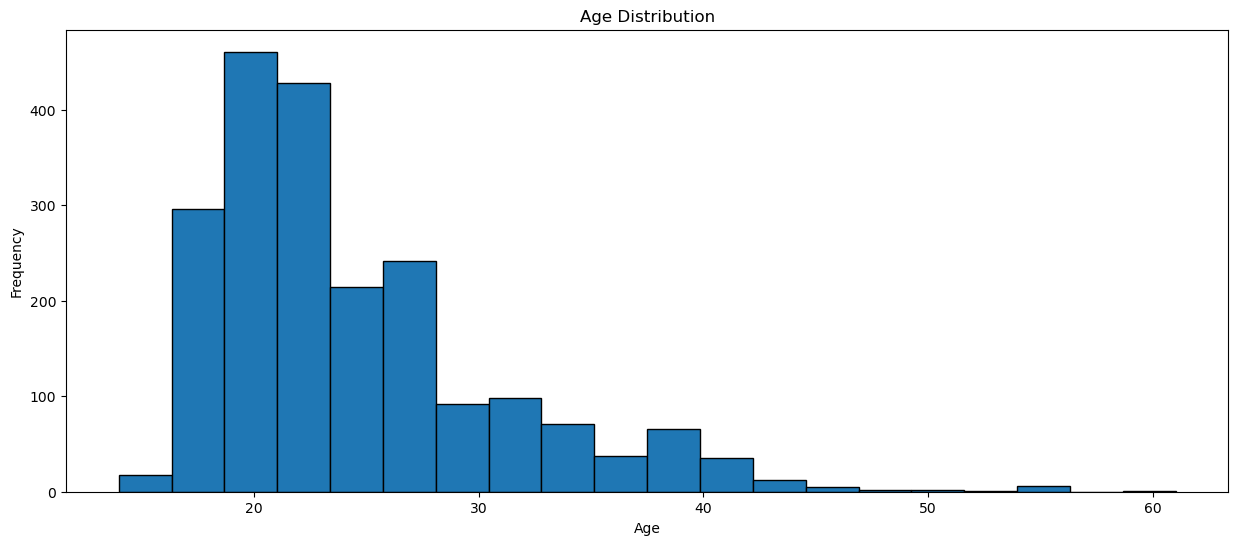

In [18]:
 
age_column = 'Age'  # Replace with the actual column name if different

# Display summary statistics of the age column
print("\nSummary statistics of age:")
print(cleaned_data[age_column].describe())

# Plot the distribution of age
plt.figure(figsize=(15, 6))
plt.hist(cleaned_data[age_column], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Summary statistics of height:
count    2087.000000
mean        1.702674
std         0.093186
min         1.450000
25%         1.630178
50%         1.701584
75%         1.769491
max         1.980000
Name: Height, dtype: float64

Summary statistics of weight:
count    2087.000000
mean       86.858730
std        26.190847
min        39.000000
25%        66.000000
50%        83.101100
75%       108.015907
max       173.000000
Name: Weight, dtype: float64


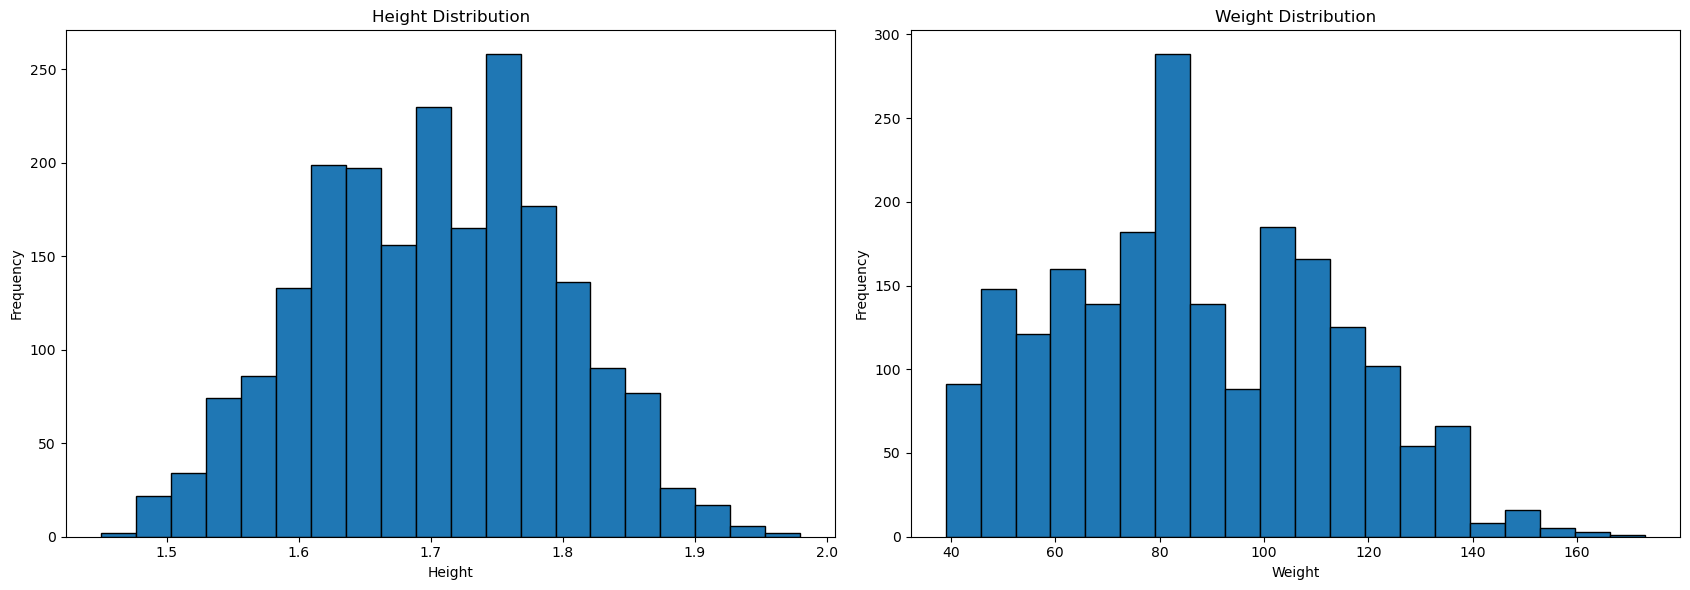

In [19]:
 

height_column = 'Height'  
weight_column = 'Weight'  

# Display summary statistics of the height and weight columns
print("\nSummary statistics of height:")
print(cleaned_data[height_column].describe())

print("\nSummary statistics of weight:")
print(cleaned_data[weight_column].describe())

# Plot the distribution of height
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.hist(cleaned_data[height_column], bins=20, edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Plot the distribution of weight
plt.subplot(1, 2, 2)
plt.hist(cleaned_data[weight_column], bins=20, edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()



Distribution of family history with overweight:
family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64


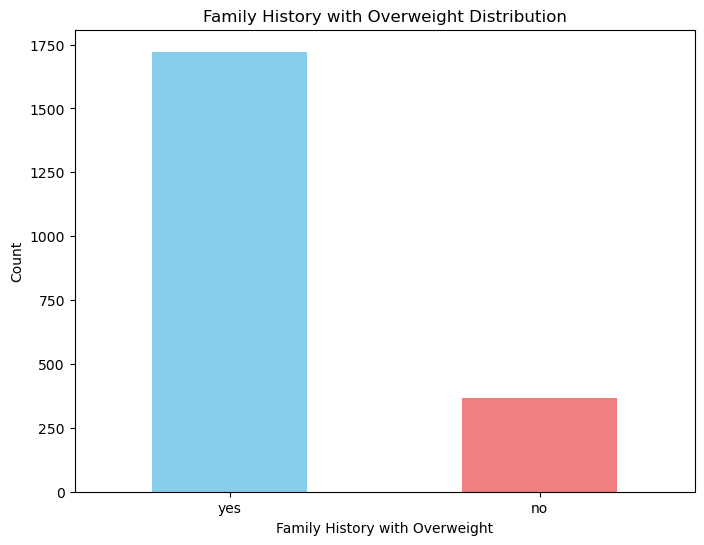

In [20]:
family_history_column = 'family_history_with_overweight'  

# Display the distribution of family history with overweight
family_history_distribution = cleaned_data[family_history_column].value_counts()
print("\nDistribution of family history with overweight:")
print(family_history_distribution)

# Plot the distribution of family history with overweight
plt.figure(figsize=(8, 6))
family_history_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Family History with Overweight Distribution')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

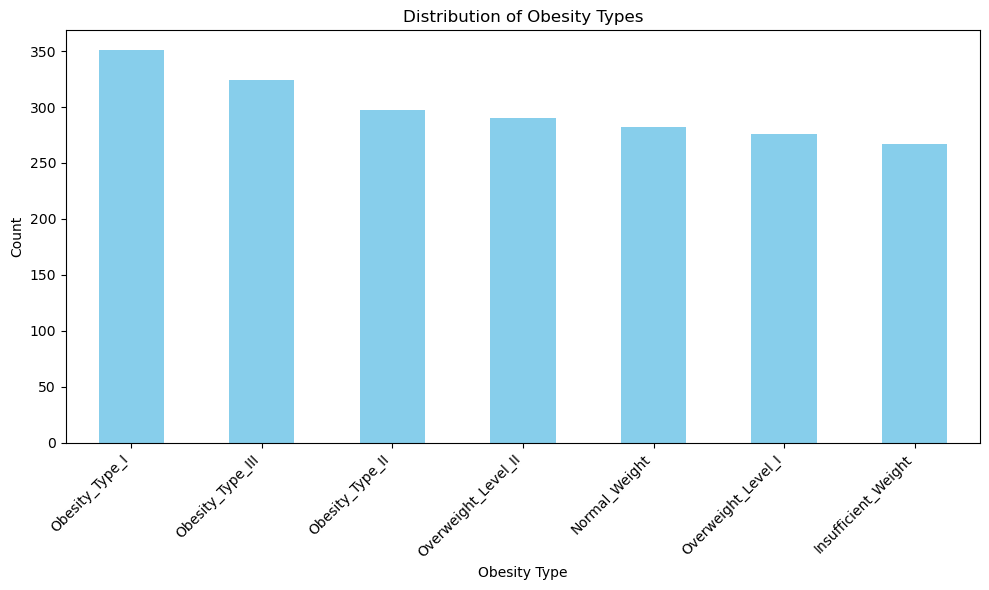

In [21]:
obesity_type_column = 'NObeyesdad'   

# Calculate the frequency of each type of obesity
obesity_type_distribution = cleaned_data[obesity_type_column].value_counts()

# Plot a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
obesity_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Obesity Types')
plt.xlabel('Obesity Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')   
plt.tight_layout()
plt.show()


/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


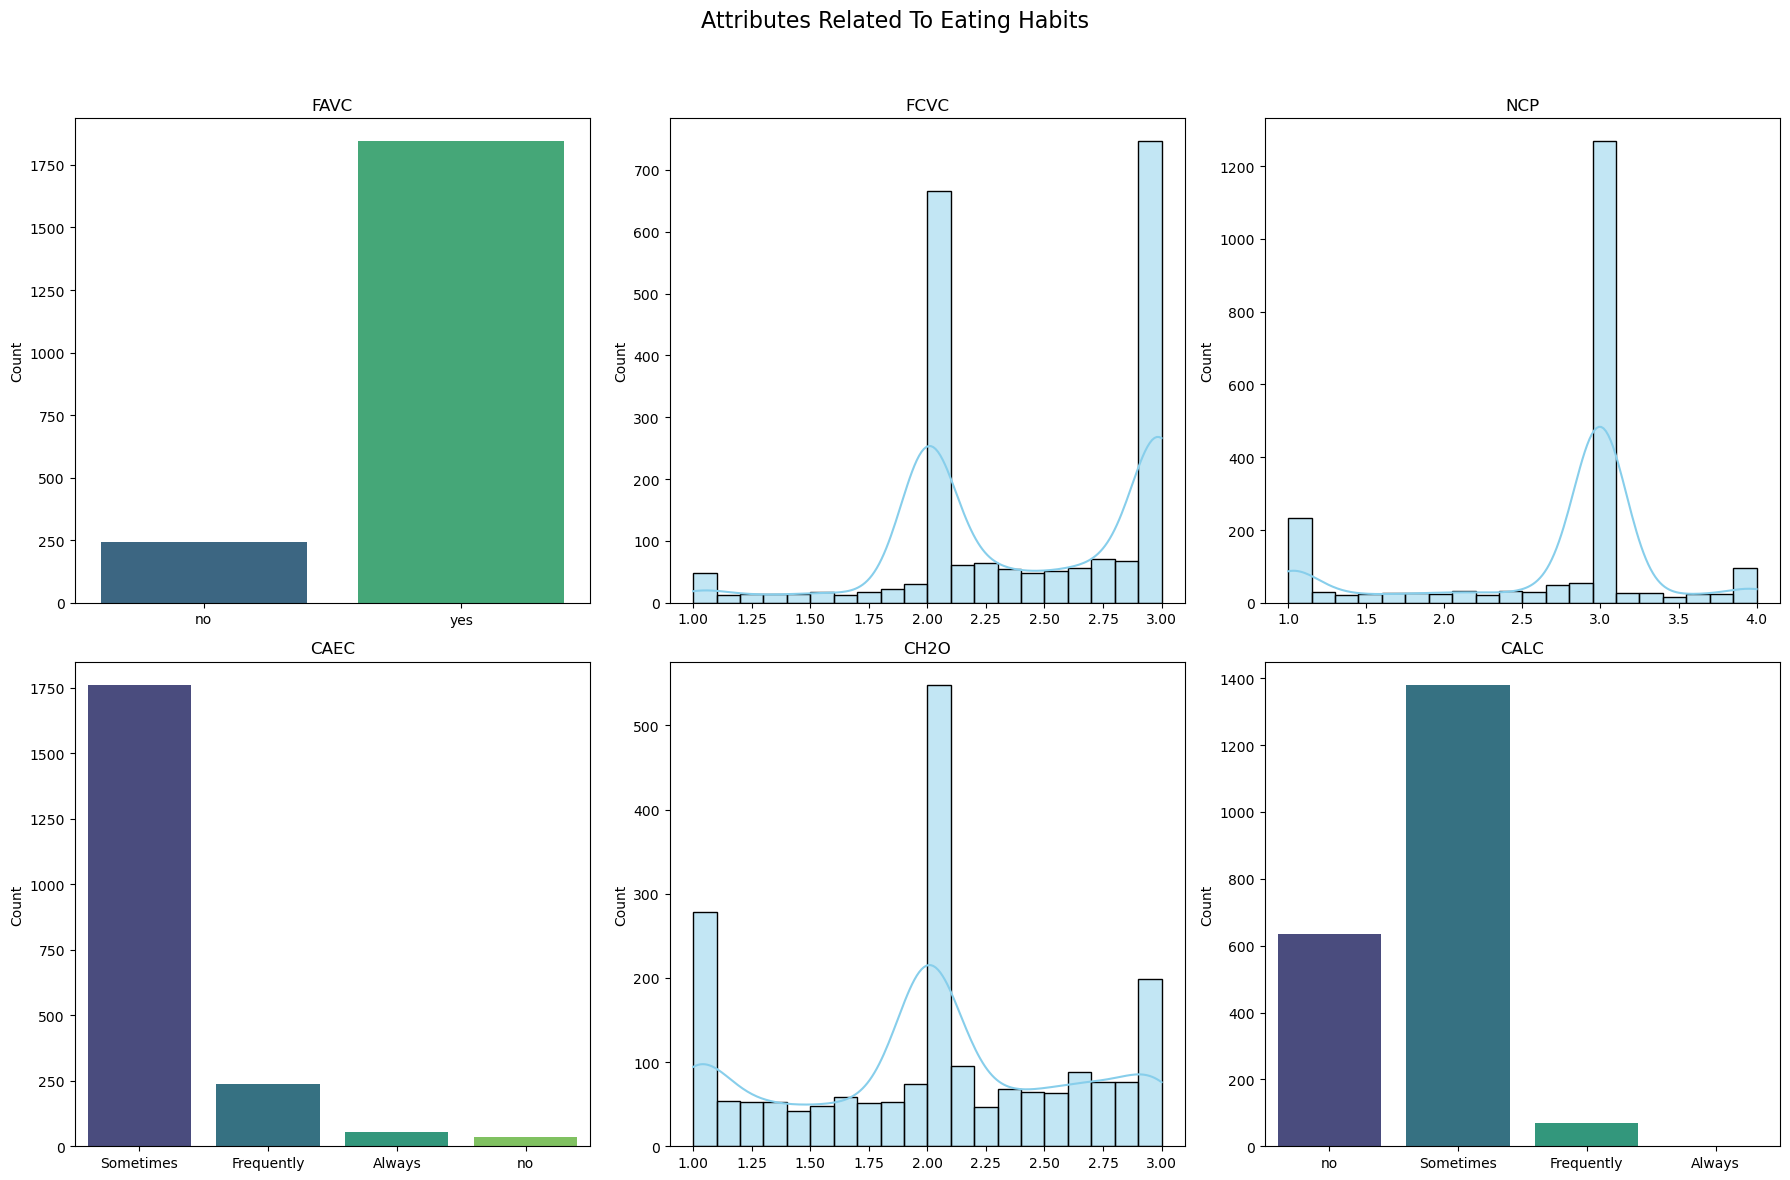

In [22]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Attributes Related To Eating Habits', fontsize=16)

# List of features to plot
features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC']

# Plot each feature
for ax, feature in zip(axes.flatten(), features):
    if cleaned_data[feature].dtype == 'object':
        sns.countplot(x=feature, data=cleaned_data, ax=ax, palette='viridis')
    else:
        sns.histplot(cleaned_data[feature], bins=20, kde=True, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


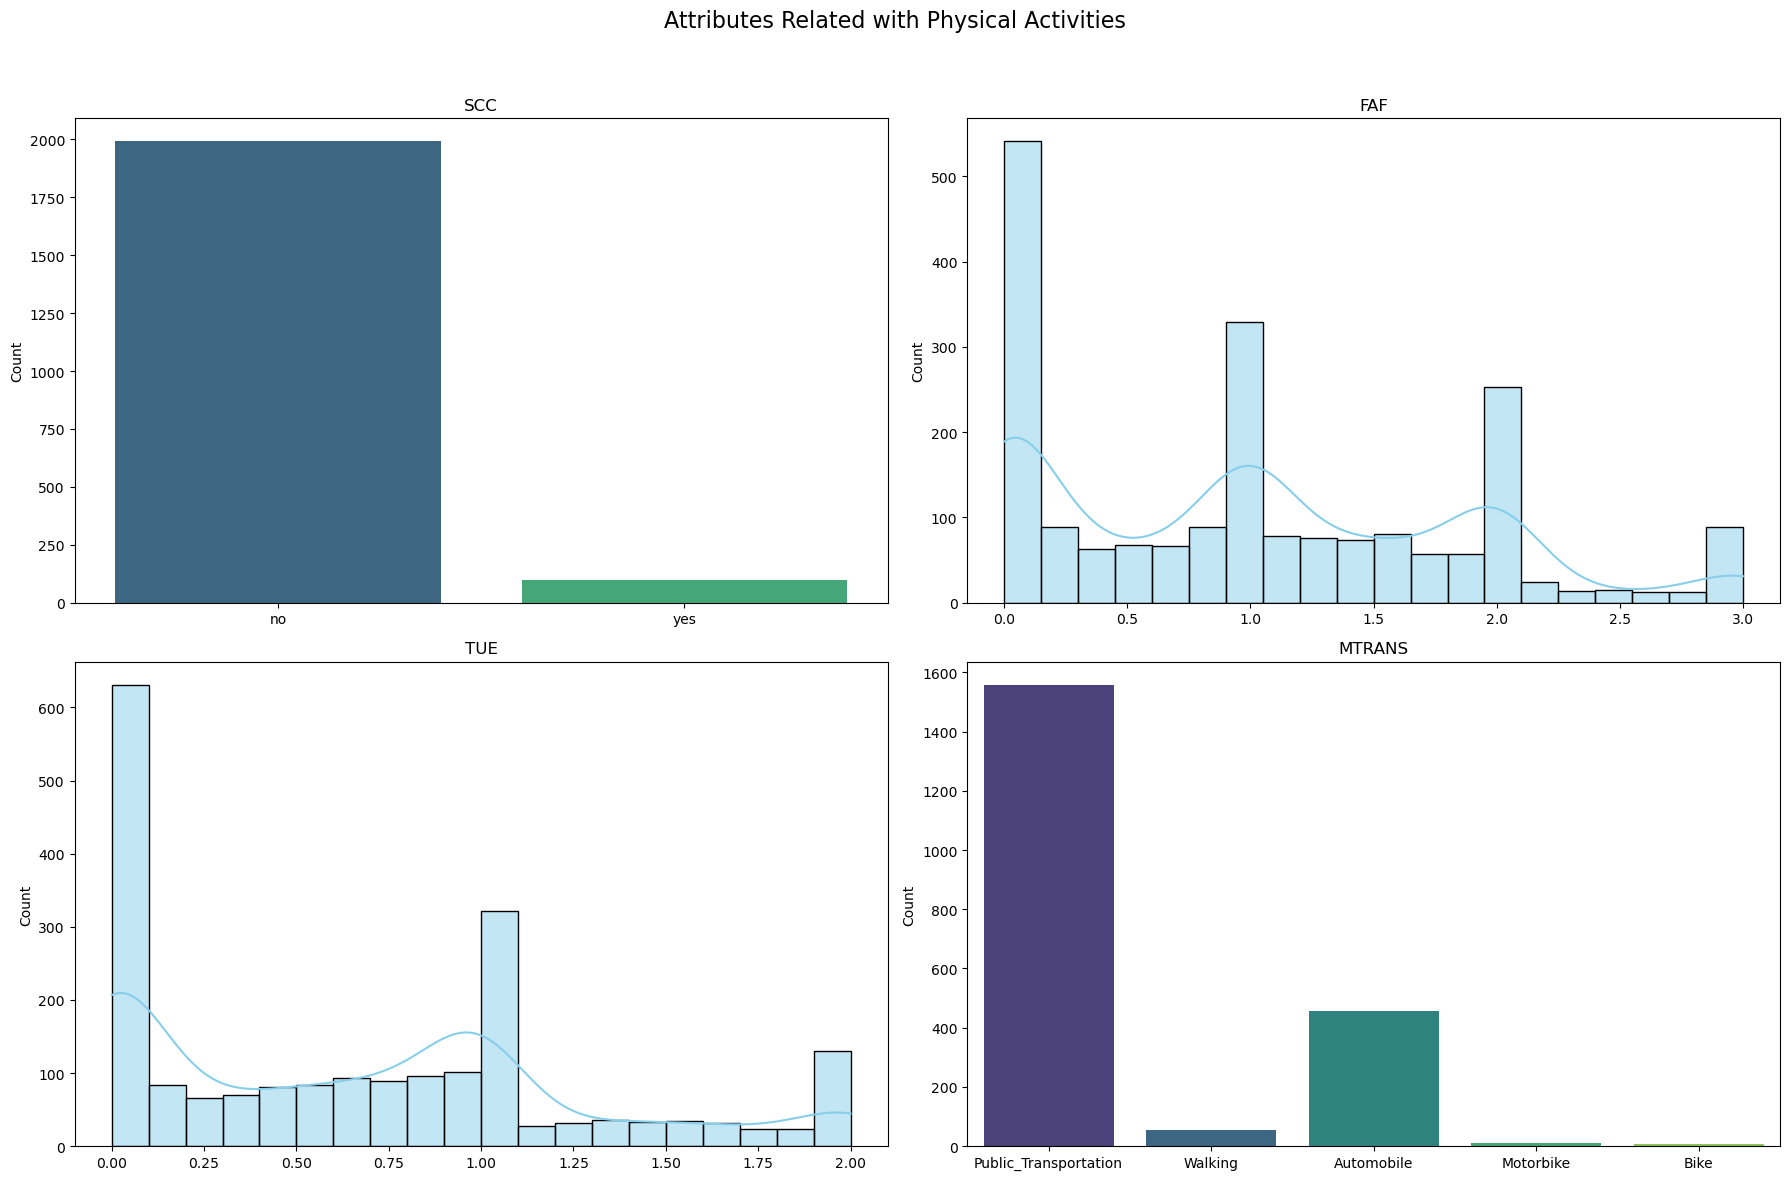

In [23]:

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Attributes Related with Physical Activities', fontsize=16)

# List of features to plot
features = ['SCC', 'FAF', 'TUE', 'MTRANS']

# Plot each feature
for ax, feature in zip(axes.flatten(), features):
    if cleaned_data[feature].dtype == 'object':
        sns.countplot(x=feature, data=cleaned_data, ax=ax, palette='viridis')
    else:
        sns.histplot(cleaned_data[feature], bins=20, kde=True, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gilbertzamoradichoso/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


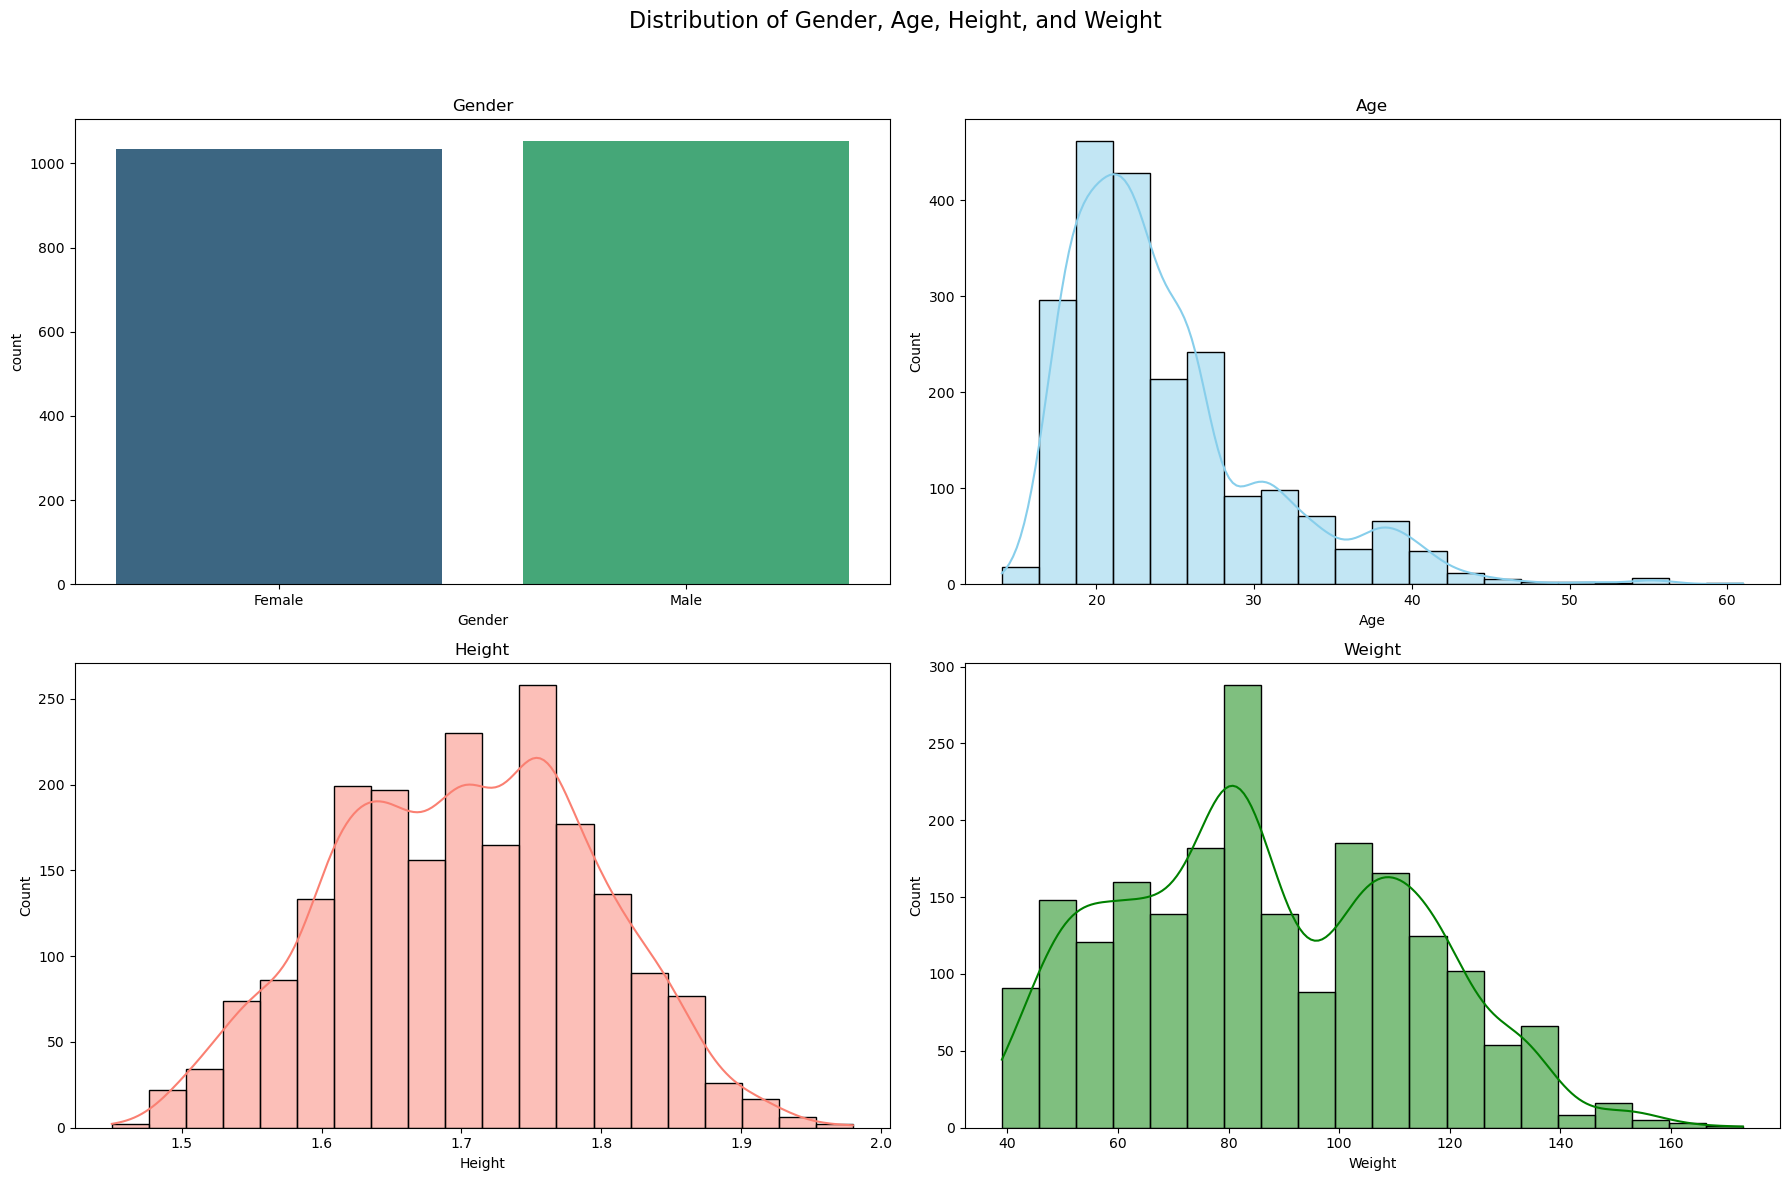

In [24]:

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Distribution of Gender, Age, Height, and Weight', fontsize=16)

# Plot each feature
sns.countplot(x='Gender', data=cleaned_data, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Gender')

sns.histplot(cleaned_data['Age'], bins=20, kde=True, ax=axes[0, 1], color='skyblue', edgecolor='black')
axes[0, 1].set_title('Age')

sns.histplot(cleaned_data['Height'], bins=20, kde=True, ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Height')

sns.histplot(cleaned_data['Weight'], bins=20, kde=True, ax=axes[1, 1], color='green', edgecolor='black')
axes[1, 1].set_title('Weight')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Summary statistics of gender:
count     2087
unique       2
top       Male
freq      1052
Name: Gender, dtype: object

Summary statistics of obesity (NObeyesdad):
count               2087
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object


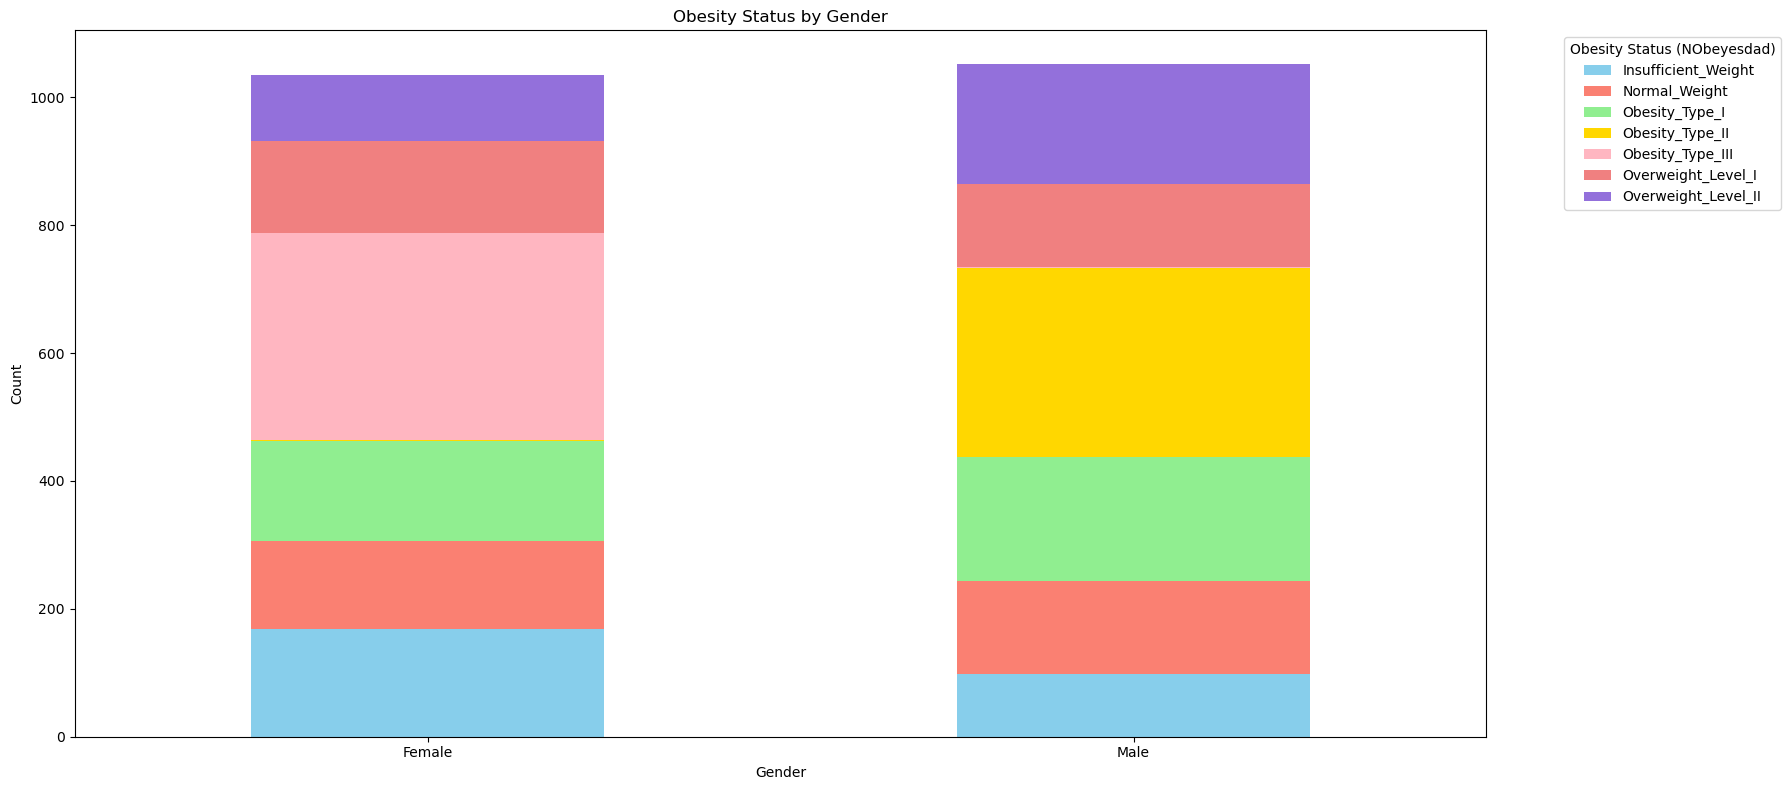

In [36]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'Cleaned_ObesityDataSet.csv'

# Read the CSV file into a DataFrame
cleaned_data = pd.read_csv(file_path)

# Define gender and obesity columns
gender_column = 'Gender'
obesity_column = 'NObeyesdad'  

# Ensure the columns exist
if gender_column in cleaned_data.columns and obesity_column in cleaned_data.columns:
    # Display summary statistics of the gender and obesity columns
    print("\nSummary statistics of gender:")
    print(cleaned_data[gender_column].describe())

    print("\nSummary statistics of obesity (NObeyesdad):")
    print(cleaned_data[obesity_column].describe())
    
    # Create a crosstab to count obesity status by gender
    gender_obesity_counts = pd.crosstab(cleaned_data[gender_column], cleaned_data[obesity_column])
    
    # Define colors for each obesity status category
    unique_obesity_categories = cleaned_data[obesity_column].unique()
    colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightpink', 'lightcoral', 'mediumpurple'][:len(unique_obesity_categories)]
    
    # Plot the data
    ax = gender_obesity_counts.plot(kind='bar', stacked=True, color=colors, figsize=(18, 8))
    plt.title('Obesity Status by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.legend(title='Obesity Status (NObeyesdad)', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"One or both columns '{gender_column}' and '{obesity_column}' do not exist in the DataFrame.")


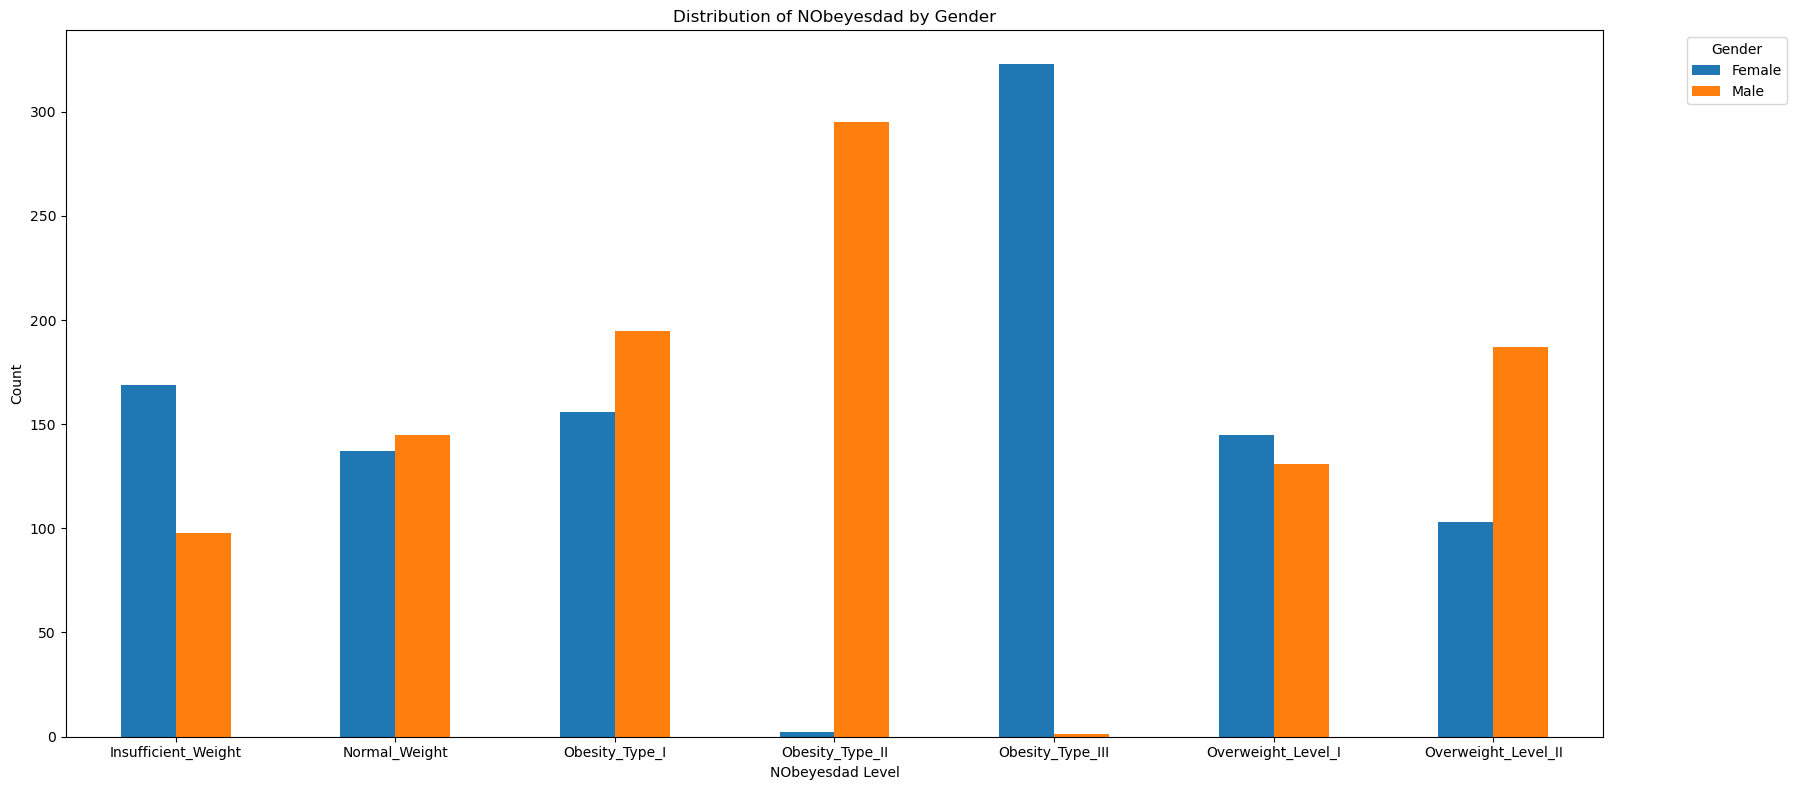

In [37]:
# Define columns
obesity_column = 'NObeyesdad'  # Assuming 'NObeyesdad' is the column indicating obesity status
gender_column = 'Gender'  # Assuming 'Gender' is the column indicating gender

# Ensure the columns exist
if obesity_column in cleaned_data.columns and gender_column in cleaned_data.columns:
    # Create a crosstab to count obesity status by gender
    crosstab = pd.crosstab(cleaned_data[obesity_column], cleaned_data[gender_column])

    # Plot the graph
    crosstab.plot(kind='bar', figsize=(18, 8))
    plt.title('Distribution of NObeyesdad by Gender')
    plt.xlabel('NObeyesdad Level')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"One or both columns '{obesity_column}' and '{gender_column}' do not exist in the DataFrame.")

<Figure size 1200x1200 with 0 Axes>

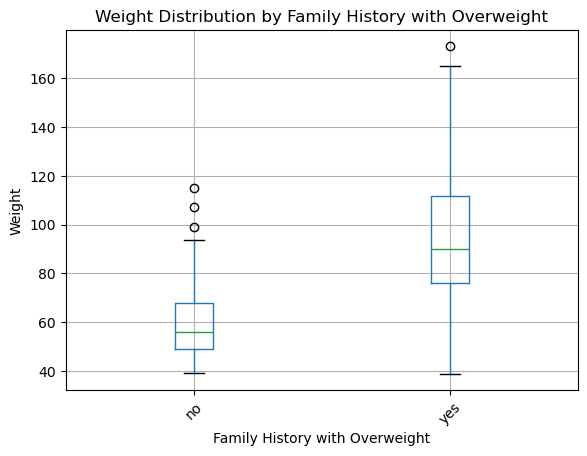

In [38]:
# Define columns
weight_column = 'Weight'
family_history_column = 'family_history_with_overweight'  # Assuming this is the correct column name

# Ensure the columns exist
if weight_column in cleaned_data.columns and family_history_column in cleaned_data.columns:
    # Plot the box plot
    plt.figure(figsize=(12, 12))
    cleaned_data.boxplot(column=weight_column, by=family_history_column)
    plt.title('Weight Distribution by Family History with Overweight')
    plt.xlabel('Family History with Overweight')
    plt.ylabel('Weight')
    plt.suptitle('')  # Remove automatically generated title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
else:
    print(f"One or both columns '{weight_column}' and '{family_history_column}' do not exist in the DataFrame.")

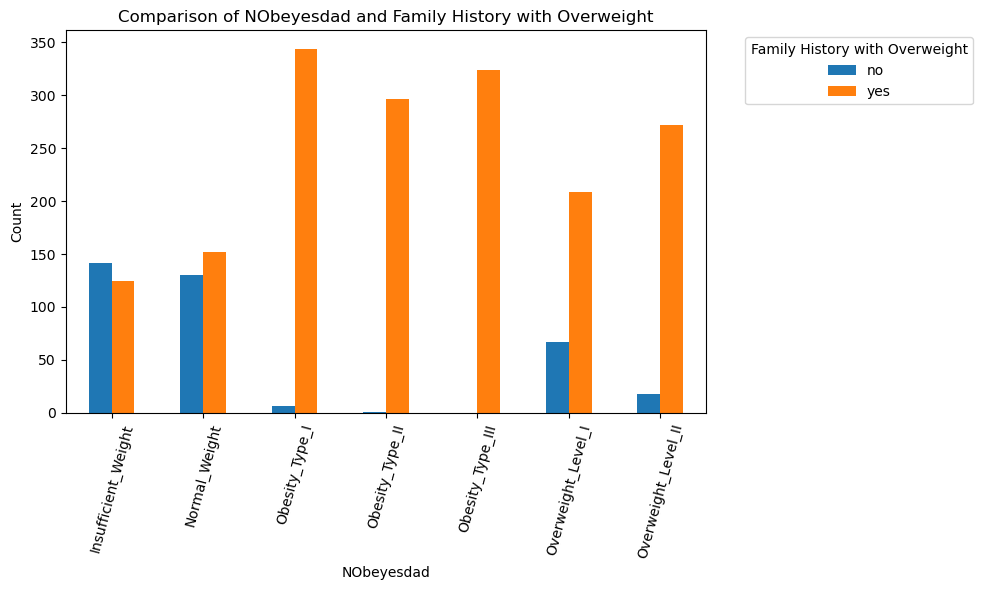

In [39]:
# Define columns
obesity_column = 'NObeyesdad'
family_history_column = 'family_history_with_overweight'  # Assuming this is the correct column name

# Ensure the columns exist
if obesity_column in cleaned_data.columns and family_history_column in cleaned_data.columns:
    # Create a crosstab to count obesity status by family history
    crosstab = pd.crosstab(cleaned_data[obesity_column], cleaned_data[family_history_column])

    # Plot the graph
    crosstab.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of NObeyesdad and Family History with Overweight')
    plt.xlabel('NObeyesdad')
    plt.ylabel('Count')
    plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
    plt.legend(title='Family History with Overweight', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"One or both columns '{obesity_column}' and '{family_history_column}' do not exist in the DataFrame.")

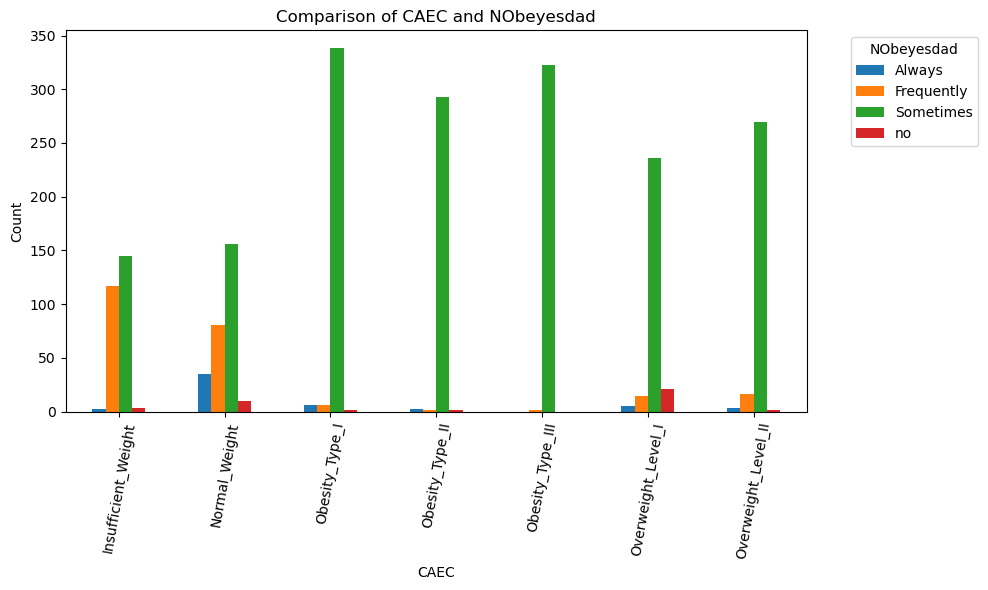

In [40]:
# Define columns
caec_column = 'CAEC'  # Consumption of food between meals
obesity_column = 'NObeyesdad'

# Ensure the columns exist
if caec_column in cleaned_data.columns and obesity_column in cleaned_data.columns:
    # Create a crosstab to count obesity status by CAEC
    crosstab = pd.crosstab(cleaned_data[obesity_column], cleaned_data[caec_column])

    # Plot the graph
    crosstab.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of CAEC and NObeyesdad')
    plt.xlabel('CAEC')
    plt.ylabel('Count')
    plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
    plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"One or both columns '{caec_column}' and '{obesity_column}' do not exist in the DataFrame.")